In [13]:
from erddapy import ERDDAP
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import datetime
import json
import matplotlib.pyplot as plt
import pandas as pd
import xarray as ds
import scipy
from scipy.interpolate import griddata
from os.path import dirname, join as pjoin
import scipy.io as sio

In [ ]:
# acceso ERDDAP error
#e = ERDDAP(server="https://erddap.sensors.ioos.us/erddap", protocol="tabledap",)
#e.dataset_id = ("edu_ucsd_cdip_191")
#e.tabledap_initialize()

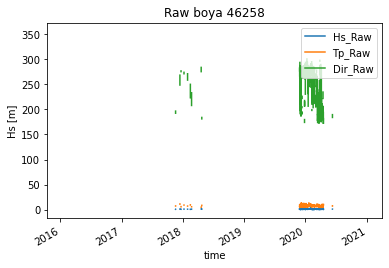

In [14]:
# prueba datos 220-Mission Bay West CA (46258) ---- ERROR RARO: no se visualizan todos los datos del .csv
url = "http://erddap.sensors.ioos.us/erddap/tabledap/edu_ucsd_cdip_220.csv?time%2Cz%2Csea_water_temperature%2Csea_water_temperature_qc_agg%2Csea_surface_wave_mean_period%2Csea_surface_wave_mean_period_qc_agg%2Csea_surface_wave_period_at_variance_spectral_density_maximum%2Csea_surface_wave_period_at_variance_spectral_density_maximum_qc_agg%2Csea_surface_wave_from_direction%2Csea_surface_wave_from_direction_qc_agg%2Csea_surface_wave_significant_height%2Csea_surface_wave_significant_height_qc_agg&time%3E=2015-01-01T00%3A00%3A00Z&time%3C=2020-12-31T23%3A59%3A59"
df = pd.read_csv(url, skiprows=[1], infer_datetime_format=True, parse_dates=['time'], index_col='time')
df['sea_surface_wave_significant_height'].plot(label='Hs_Raw')
df['sea_surface_wave_mean_period'].plot(label='Tp_Raw')
df['sea_surface_wave_from_direction'].plot(label='Dir_Raw')
# Create a 40 hour rolling low-pass filter
#df['sea_surface_wave_significant_height'].dropna().rolling(window=1*1,win_type='hamming').mean().plot(label='Filter')
plt.title("Raw boya 46258")
plt.ylabel('Hs [m]')
plt.legend()

Text(0, 0.5, 'Dir (deg)')

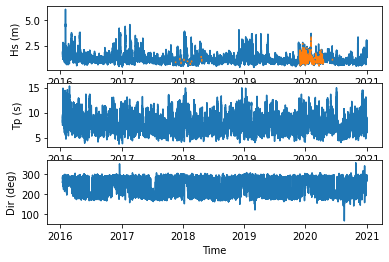

In [22]:
# graficar datos interpolados 
fig,(ax1,ax2,ax3)= plt.subplots(3)

ax1.plot(df['sea_surface_wave_significant_height'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax1.set_ylabel('Hs (m)')

ax2.plot(df['sea_surface_wave_mean_period'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax2.set_ylabel('Tp (s)')

ax3.plot(df['sea_surface_wave_from_direction'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax3.set_xlabel('Time')
ax3.set_ylabel('Dir (deg)')



In [ ]:
# cargar datos .MAT de ADCP Ensenada (ERROR: no sé cómo leer estructura)
#import scipy.io as spio
#a = spio.loadmat('ENS_waves_Nov12_Feb21_corr.mat')
#np.who(a)

In [23]:
# datos de ADCP Ensenada
# abrir con PANDA
adcp_test = pd.read_csv("ADCP_ENS_hsTpDir_time.csv")
adcp_test

,735174.25,0.86968991,11.3993,268.506
0,735174.29,0.861474,11.463800,268.64
1,735174.33,0.845447,11.548100,268.703
2,735174.38,0.865776,11.668400,268.598
3,735174.42,0.875543,11.832400,268.497
4,735174.46,0.882541,11.925200,268.422
...,...,...,...,...
70198,738192.63,0.763850,6.708864,NaN
70199,738192.67,0.678276,6.096861,NaN
70200,738192.72,0.640574,7.686336,NaN
70201,738192.76,0.674156,8.474583,NaN


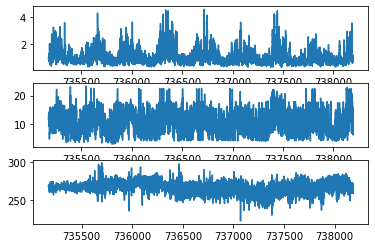

In [36]:
# graficar con numpy datos ADCP (ERROR: cambiar de hora matlab a hora real)
adcp=np.genfromtxt('ADCP_ENS_hsTpDir_time.csv',delimiter=',')
time=adcp[:,0]
hs=adcp[:,1];
tp=adcp[:,2];
dirm=adcp[:,3];
fig,(ax1,ax2,ax3)= plt.subplots(3)
ax1.plot(time,hs)
ax2.plot(time,tp)
ax3.plot(time,dirm)


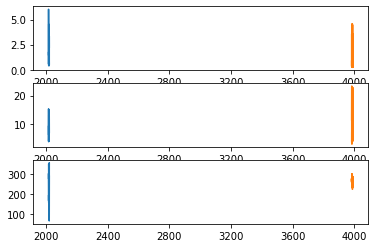

In [38]:
# graficar datos ADCP vs datos BOYA (ERROR: datos ADCP tienen tiempo Matlab mientras que Boya son tiempo real)
fig,(ax1,ax2,ax3)= plt.subplots(3)
ax1.plot(df['sea_surface_wave_significant_height'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax1.plot(time,hs)
ax2.plot(df['sea_surface_wave_mean_period'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax2.plot(time,tp)
ax3.plot(df['sea_surface_wave_from_direction'].dropna().rolling(window=1*1,win_type='hamming').mean())
ax3.plot(time,dirm)